# AOS_OPD_phosim

Notebook to develop code that ends up in `run_ps1_opd.py`

In [2]:
from astropy.table import Table
import os
import pandas as pd
import numpy as np 
import argparse
import run_ps1_functions as func
import imp
imp.reload(func)

gt_dict = func.get_field_ra_dec()


instruments = ['comCam']#  ['lsstCam', 'comCam', 'wfs']
fields = ['high']
positions =['extra','intra','focal']
exposure = 0.25
phosim_p = 25
cmd_file = 'noBkgndPert00_NCSA.cmd'
phosim_path = "/project/scichris/aos/phosim_syseng4/phosim.py"
root_dir = "/project/scichris/aos/ps1_phosim/"
run = 1 
dry_run = True 

In [3]:
from lsst.ts.phosim.SkySim import SkySim
import numpy as np 
from astropy.table import Table
from astropy.table import  hstack
from astropy.table import  vstack
import matplotlib.pyplot as plt

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18



instrument = instruments[0]
field = fields[0]
position = positions[0]

mjd = 59580  # arbitrary observation date, but 
             # make it consistent with that used 
             # for other observations  
        

rotSkyPos = 0 # rotation angle in degrees 
print(instrument)

comCam


In [4]:
import run_ps1_opd as opd


raField=0
decField=0
rotskypos=0
if instrument == 'comCam':
    sensorNames, xCenter, yCenter = opd.get_all_sensor_names_xy(LsstComCam().getCamera())

elif instrument == 'lsstCam':
    sensorNames, xCenter, yCenter = opd.get_all_sensor_names_xy(LsstCam().getCamera())

elif instrument == 'wfs':
    sensorNames, xCenter, yCenter = opd.get_wfs_sensor_names_xy()

 # Declare the SkySim()
skySim = SkySim()

# Set the observation information
skySim.setObservationMetaData(raField, decField, rotskypos)

xPx = xCenter
yPx = yCenter
starMag = 15


starId = 0 
# we have only one x,y point per sensor 
for i in range(len(sensorNames)):
    skySim.addStarByChipPos(sensorNames[i], starId, xCenter[i],
                            yCenter[i], starMag)
    starId += 1 

raList , decList = skySim.getRaDecInDeg()

NameError: name 'LsstComCam' is not defined

In [87]:
raList

array([2.37387531e-01, 2.66666666e-03, 3.59767946e+02, 2.37387531e-01,
       2.66666666e-03, 3.59767946e+02, 2.37387531e-01, 2.66666666e-03,
       3.59767946e+02])

In [88]:
m =raList>180
raList[m] = raList[m] - 360
raList

array([ 0.23738753,  0.00266667, -0.23205429,  0.23738753,  0.00266667,
       -0.23205429,  0.23738753,  0.00266667, -0.23205429])

In [13]:
from lsst.obs.lsst import LsstCam, LsstComCam
#camera = LsstComCam().getCamera()
camera = LsstCam().getCamera()

In [14]:
detector = camera.get("R00_SW1")
bbox = detector.getBBox()
print(bbox.centerX, bbox.centerY)

2035.5 999.5


In [35]:
detector.

In [43]:
camera = LsstComCam().getCamera()
for detector in camera:
    print(detector.getName())

R22_S00
R22_S01
R22_S02
R22_S10
R22_S11
R22_S12
R22_S20
R22_S21
R22_S22


In [38]:
Need to get hte 

1999.5

In [3]:
def get_all_sensor_names_xy(camera):
    
    sensorNames = []
    xCenter, yCenter = [], []
    for detector in camera:
        bbox = detector.getBBox()
        xCen, yCen = bbox.centerX, bbox.centerY
        xCenter.append(xCen)
        yCenter.append(yCen)
        sensorNames.append(detector.getName())
        
    return sensorNames, xCenter, yCenter


def get_wfs_sensor_names_xy():
    sensorNames = [  "R04_SW0", "R04_SW1",
                     "R44_SW0", "R44_SW1",
                     "R00_SW0", "R00_SW1",
                     "R40_SW0", "R40_SW1"
                   ]
    xCenter = []
    yCenter = []
    camera = LsstCam().getCamera()
    for sensor in sensorNames:
        detector = camera.get(sensor)
        bbox = detector.getBBox()
        xCen, yCen = bbox.centerX, bbox.centerY
        xCenter.append(xCen)
        yCenter.append(yCen)
        
    return sensorNames, xCenter, yCenter

In [4]:
sensorNames = [  "R04_SW0", "R04_SW1",
                 "R44_SW0", "R44_SW1",
                 "R00_SW0", "R00_SW1",
                 "R40_SW0", "R40_SW1"
               ]
xCenter = []
yCenter = []
camera = LsstCam().getCamera()
for sensor in sensorNames:
    detector = camera.get(sensor)
    bbox = detector.getBBox()
    xCen, yCen = bbox.centerX, bbox.centerY
    xCenter.append(xCen)
    yCenter.append(yCen)

In [14]:
from astropy.table import Table
from lsst.ts.phosim.SkySim import SkySim
import os
import pandas as pd
import numpy as np 
from lsst.obs.lsst import LsstCam, LsstComCam

raField=0
decField=0
rotskypos=0

# Declare the SkySim()
skySim = SkySim()

# Set the observation information
skySim.setObservationMetaData(raField, decField, rotskypos)

xPx = xCenter
yPx = yCenter
starMag = 15


starId = 0 

sensor_short  = []
# we have only one x,y point per sensor 
for i in range(len(sensorNames)):
    skySim.addStarByChipPos(sensorNames[i], starId, xCenter[i],
                            yCenter[i], starMag)
    starId += 1 
    sensor_short.append(sensorNames[i][:3])
    
raList , decList = skySim.getRaDecInDeg()

# Note:  ra for phosim is (0 <= ra <= 360). But the 
# field position might be < 0 (-180 <= field_ra <= 180).
# So here I change 
# the (0,360) range to (-180,180) range:
m =raList>180
raList[m] = raList[m] - 360

mags = skySim.getStarMag()
coords = Table(data=[raList, decList, xCenter, yCenter, mags, sensorNames,sensor_short], 
             names=['ra','dec', 'xPx', 'yPx','r','sensor','short' ]  )

In [15]:
coords

ra,dec,xPx,yPx,r,sensor,short
float64,float64,float64,float64,float64,str7,str3
-1.1830262968173315,-1.1322778103399687,2035.5,999.5,15.0,R04_SW0,R04
-1.1971868521392253,-1.2474193576181027,2035.5,999.5,15.0,R04_SW1,R04
-1.1325191510422314,1.182795264517186,2035.5,999.5,15.0,R44_SW0,R44
-1.2476916295145202,1.1969030878961635,2035.5,999.5,15.0,R44_SW1,R44
1.1325191510422252,-1.1827952645171782,2035.5,999.5,15.0,R00_SW0,R00
1.247691629514483,-1.1969030878961564,2035.5,999.5,15.0,R00_SW1,R00
1.1830262968173502,1.1322778103399762,2035.5,999.5,15.0,R40_SW0,R40
1.1971868521391877,1.2474193576181096,2035.5,999.5,15.0,R40_SW1,R40


In [19]:
grouped = coords.group_by('short')

In [22]:
grouped.groups.keys

short
str3
R00
R04
R40
R44


In [23]:
coords_mean = grouped.groups.aggregate(np.mean)

In [24]:
coords_mean

ra,dec,xPx,yPx,r,short
float64,float64,float64,float64,float64,str3
1.190105390278354,-1.1898491762066672,2035.5,999.5,15.0,R00
-1.1901065744782784,-1.1898485839790358,2035.5,999.5,15.0,R04
1.190106574478269,1.189848583979043,2035.5,999.5,15.0,R40
-1.1901053902783758,1.1898491762066747,2035.5,999.5,15.0,R44


Text(0, 0.5, 'dec')

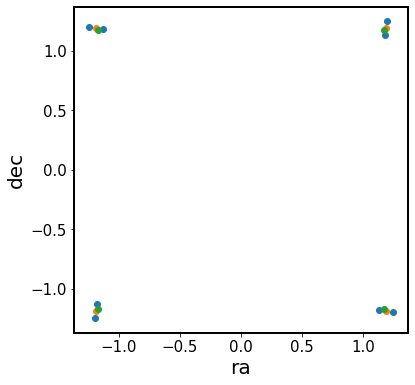

In [31]:
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(6,6))

fieldWFSx = [1.176, -1.176, -1.176, 1.176]
fieldWFSy = [1.176, 1.176, -1.176, -1.176]
    
    
ax.scatter(coords['ra'], coords['dec'])
ax.scatter(coords_mean['ra'], coords_mean['dec'])
ax.scatter(fieldWFSx, fieldWFSy)
ax.set_xlabel('ra')
ax.set_ylabel('dec')

Blue: using skySim to get coords of the center of each corner sensor. Orange - taking the mean of each pair of coordinates. Green - the fieldXY from https://github.com/lsst-ts/ts_phosim/blob/017c858758628ab8d7e2f2321fb65a45879fd841/python/lsst/ts/phosim/OpdMetrology.py#L198 

In [100]:
from lsst.obs.lsst import LsstCam, LsstComCam
# for comCam and lsstCam, get sensor names from obs_lsst mapper
# for WFS, write them manually 


def get_opd_ra_dec(instrument, raField, decField, rotskypos=0):
    if instrument == 'comCam':
        sensorNames, xCenter, yCenter = get_all_sensor_names_xy(LsstComCam().getCamera())

    elif instrument == 'lsstCam':
        sensorNames, xCenter, yCenter = get_all_sensor_names_xy(LsstCam().getCamera())

    elif instrument == 'wfs':
        sensorNames, xCenter, yCenter = get_wfs_sensor_names_xy()

     # Declare the SkySim()
    skySim = SkySim()
    
    # Set the observation information
    skySim.setObservationMetaData(raField, decField, rotskypos)
        
    xPx = xCenter
    yPx = yCenter
    starMag = 15


    starId = 0 
    # we have only one x,y point per sensor 
    for i in range(len(sensorNames)):
        skySim.addStarByChipPos(sensorNames[i], starId, xCenter[i],
                                yCenter[i], starMag)
        starId += 1 

    raList , decList = skySim.getRaDecInDeg()
    mags = skySim.getStarMag()
    coords = Table(data=[raList, decList, xCenter, yCenter, mags], 
                 names=['ra','dec', 'xPx', 'yPx','r' ]  )

    # add a column with object id 
    coords['objid'] = np.arange(len(coords_com))

    panda_cat = coords.to_pandas()
    
    return panda_cat



obshistid = func.calculate_obshistid(instrument, field, position, cmd_file, run)

gt_dict = func.get_field_ra_dec()
raField = gt_dict[field]["ra"] 
decField = gt_dict[field]["dec"]

panda_cat = get_opd_ra_dec(instrument, raField, decField)

opd.write_opd_inst_file(
    panda_cat,
    raField,
    decField,
    phosim_file="opd.inst",
    passband="r",
    out_dir="./",
    camconfig=3,
    exposure=15,
    obsid=obshistid,
    position="focal",
    mjd=59580,
    magcol=None)



Saved as  ./opd.inst


In [77]:
rotskypos=0
rottelpos=0
ra = 0
dec = 0 

position='focal'
camconfig=3,
opsim_filter=3,
mjd=59580.0,
exposure=0.25,
obsid=9006002,
position='focal',
seeing=0.69

content = [f"Opsim_obshistid {obsid}",
       f"Opsim_filter {opsim_filter}\n",
       f"mjd {mjd}\n",
       "SIM_SEED 1000\n"
       f"rightascension {ra}\n",
       f"declination {dec}\n",
       f"rotskypos {rotskypos}\n",
       f"rottelpos {rottelpos}\n",
       "SIM_VISTIME {exposure}\n",
       "SIM_NSNAP 1\n",
       "moonphase 0.0\n",
       "moonalt -90\n",
       "sunalt -90\n",]
if position == 'extra':
    content.append("move 10 -1500.0000\n")
elif position == 'intra':
    content.append("move 10  1500.0000\n")

content.append(f"camconfig {camconfig}\n")

'Opsim_obshistid (9006002,)'

In [81]:
import run_ps1_opd as opd 
imp.reload(opd)

<module 'run_ps1_opd' from '/home/scichris/notebooks/run_ps1_opd.py'>

Saved as  ./opd.inst


In [91]:
obshistid

'9000101'

In [101]:
gt_dict = func.get_field_ra_dec()
raField = gt_dict[field]["ra"] 
decField = gt_dict[field]["dec"]

/project/scichris/aos/ts_wep/python/lsst/ts/wep/bsc/WcsSol.py:45: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  self._camera = obs_lsst.lsstCamMapper.LsstCamMapper().camera


In [19]:
%matplotlib inline cat_df

,id,ra,dec,g
0,1.0,-0.2347,0.0000,500.0
1,2.0,-0.2347,0.2347,500.0
2,3.0,0.0000,-0.2347,500.0
3,4.0,0.0000,0.0000,500.0
4,5.0,0.0000,0.2347,500.0
5,6.0,0.2347,-0.2347,500.0
6,7.0,0.2347,0.0000,500.0
7,8.0,0.2347,0.2347,500.0


I generate OPDs for all instruments, fields, positions, bkgnds, perts with :
    
    
    python run_ps1_opd.py --instruments comCam lsstCam wfs --fields high med low Baade --positions focal intra extra 

It only takes a few seconds to run it for comCam, so it doesn't make sense to submit all as separate slurm jobs.

Try using condor :

First make the executable  `runPhosim.sh`, inside which we have eg. 

    #!/bin/sh
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd --dry_run


Ensure that it can work with `./runPhosim.sh` 


And we call this executable script from inside the job.submit:
    
    
    executable = runPhosim.sh
    log = job.log.$(ClusterId).$(ProcId)
    output = job.out.$(ClusterId).$(ProcId)
    error = job.err.$(ClusterId).$(ProcId)
    request_cpus = 9
    request_memory = 3G
    queue 1

We submit this job with 


    source "/software/lsstsw/stack/loadLSST.bash"    # need that for python 
    setup lsst_distrib 

    source /project/scichris/aos/setup_aos_current.sh
    setup -k -r /project/scichris/aos/phosim_utils/
    
    condor_submit  job.phosim.submit


    
We test how it's doing with  `condor_status` 



    scontrol show node  
    
shows there are 24 CPUs per node, and 



( and just like for `runIsr.sh`, made sure its executable...). 



I edit `DM-28360/runPhosim.sh` to generate OPD for all comCam  for qckBkgnd 00 pert 
    
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert00_NCSA.cmd   --dry_run
    
    
I also edit `DM-28360/job.phosim.submit` to ask for 120 CPUs and 1000G memory ...


    condor_q 
    
    
shows that the job got submitted and is idle 


    
-- Schedd: lsst-devl02.ncsa.illinois.edu : <141.142.181.231:9618?... @ 06/04/21 19:49:15
 ID         OWNER            SUBMITTED     RUN_TIME ST PRI SIZE CMD
1037924.0   scichris        6/4  19:48   0+00:00:00 I  0    0.0 runPhosim.sh

Total for query: 1 jobs; 0 completed, 0 removed, 1 idle, 0 running, 0 held, 0 suspended 
Total for all users: 1 jobs; 0 completed, 0 removed, 1 idle, 0 running, 0 held, 0 suspended



But how can I find details of that job ?


   condor_q -l 1037924.0 
   
shows that it's held because of lack of resources 


I remove that job and try again 


    condor_rm 1037924
   

    nano job.phosim.submit   # changing  the requested CPUs to 24, and memory to 120G 
    nano runPhosim.sh  # changing phosim_p argument to 24 , to match the number of cores ... 
    
    condor_submit  job.phosim.submit
    

    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert05_NCSA.cmd
    
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file noBkgndPert05_NCSA.cmd
    

All comCam ✅  and lsstCam ✅ .  Each has OPD evaluated at the center of each CCD. 



Inspect the OPD files to see if there is any difference at all wrt their values eg. for different perturbations:
    
    
      1:  comCam  noBkgndPert00  
      2:  comCam noBkgndPert05

In [1]:
import run_ps1_functions as ps1

In [8]:
import os
obshistid =  ps1.calculate_obshistid('comCam','high', 'extra','noBkgndPert00.cmd', 1)
fpath = f'/project/scichris/aos/AOS/DM-28360/comCam/high/extra/{obshistid}/opd'
os.listdir(fpath)

['centroid_comcam_e_9000101_f2_opd_E000.txt',
 'opdcatalog_9000101.pars',
 'opd_9000101_2.fits.gz',
 'opd_9000101_3.fits.gz',
 'opd_9000101_0.fits.gz',
 'opd_9000101_4.fits.gz',
 'opd_9000101_7.fits.gz',
 'opd_9000101_5.fits.gz',
 'opd_9000101_1.fits.gz',
 'comcam_e_9000101_f2_opd_E000.fits.gz',
 'opd_9000101_8.fits.gz',
 'opd_9000101_6.fits.gz']

In [10]:
from astropy.io import fits
hdul = fits.open(os.path.join(fpath,'comcam_e_9000101_f2_opd_E000.fits.gz'))

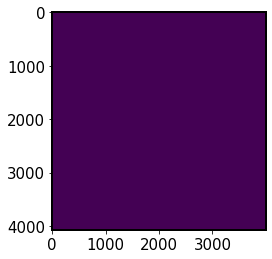

In [20]:
import matplotlib.pyplot as plt

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

plt.imshow(hdul[0].data)

(array([1.6287999e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

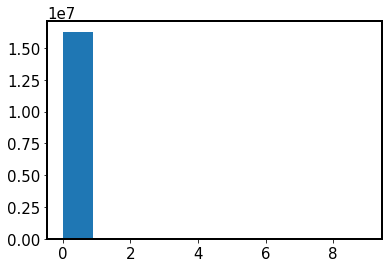

In [22]:
import numpy as np
plt.hist(np.ravel(hdul[0].data))

In [23]:
np.where(hdul[0].data > 0)

(array([2047]), array([2001]))

So this file is mostly zeros... Check out the other files :" "

(array([], dtype=int64), array([], dtype=int64))

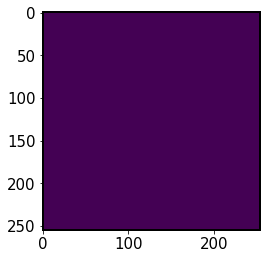

In [38]:
hdul = fits.open(os.path.join(fpath,"opd_9000101_8.fits.gz"))
plt.imshow(hdul[0].data)
np.where(hdul[0].data>0)

Check whether it's the same for OPD files for the actual imgCloseLoop : 

(array([ 61,  61,  61, ..., 215, 215, 215]),
 array([ 80,  81,  82, ..., 217, 218, 219]))

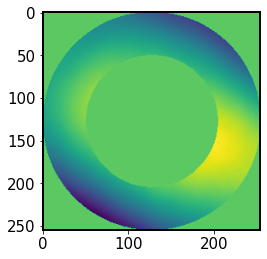

In [53]:
iterNum = 0
fpath = f'/project/scichris/aos/imgCloseLoop/iter{iterNum}/img/opd_90060{iterNum}0_0.fits.gz'
hdul = fits.open(fpath)
plt.imshow(hdul[0].data)
np.where(hdul[0].data>0)

So why am I getting only zeros?  It should be an image... What took so long to calculate if its all empty? ?  

Check in detail the command used by ts_phosim to generate OPD: 

one difference is that `imgCloseLoop` has for `opd.cmd` : 
    
    backgroundmode 0
    raydensity 0.0
    perturbationmode 1
    
while for `star.cmd` it has 

    backgroundmode 0
    raydensity 0
    perturbationmode 1
    trackingmode 0
    cleartracking
    clearclouds
    lascatprob 0.0
    contaminationmode 0
    diffractionmode 1
    straylight 0
    detectormode 0
    centroidfile 1

    
Another difference is that the inst file differs not just by location, but by lack of "move 10 1500", and shorter beginning of the cmd file (lack of `mjd` , `SIM_SEED`, `Opsim_rawseeing -1` ) 

`imgCloseLoop` has for `opd.inst`:

    Opsim_obshistid 9006000 
    Opsim_filter 1 
    rightascension 0.030000 
    declination -0.020000 
    rotskypos 90.000000 
    rottelpos 0
    SIM_VISTIME 15.0
    SIM_NSNAP 1
    move 5  0.0000 
    move 6  0.0000 
    move 7  0.0000 
    move 8  0.0000 
    move 9  0.0000 
    move 10  0.0000 

whereas for `starExtra.inst` : 

    Opsim_obshistid 9006001 
    Opsim_filter 1 
    mjd 59580.0000000000 
    SIM_SEED 1000 
    rightascension 0.030000 
    declination -0.020000 
    rotskypos 90.000000 
    rottelpos 0
    SIM_VISTIME 15.0
    SIM_NSNAP 1
    Opsim_rawseeing -1
    move 5  0.0000 
    move 6  0.0000 
    move 7  0.0000 
    move 8  0.0000 
    move 9  0.0000 
    move 10 -1500.0000 
    
So perhaps I need to  make slightly different CMD files removing those other lines (??) 

The command used is the same  - it just uses https://github.com/lsst-ts/ts_phosim/blob/017c858758628ab8d7e2f2321fb65a45879fd841/python/lsst/ts/phosim/telescope/PhosimCommu.py#L585 ...


Check if making these adjustments makes any difference ...


Find the command used to run phosim:

     python /project/scichris/aos/AOS/run_ps1_phosim.py --instruments comCam --fields high --cmd_file noBkgndPert00_NCSA.cmd --opd --dry_run
     
shows that we'd use:

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001.inst -i comcam -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000001/opd -p 25  -o /project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000001/opd > /project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000001/opdPhoSim.log 2>&1






0) Run the original inst file and cmd file 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/0_original/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/0_original/> /project/scichris/aos/AOS/DM-28360/test_OPD/0_original/opdPhoSim.log 2>&1

1) Try changing the  inst_file (`opd_comCam_high_focal_9000001_1.inst` - remove `mjd`, `SIM_SEED`, `Opsim_rawseeing`), but use the same CMD file 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_1.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/1_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/1_/> /project/scichris/aos/AOS/DM-28360/test_OPD/1_/opdPhoSim.log 2>&1

2) change both inst_file to (`opd_comCam_high_focal_9000001_1.inst` - - remove `mjd`, `SIM_SEED`, `Opsim_rawseeing`) and CMD file (to `noBkgndPert00_NCSA_1.cmd` - remove `trackingmode 0 , cleartracking clearclouds   lascatprob 0.0 contaminationmode 0 diffractionmode 1straylight 0detectormode 0 centroidfile 1`). 

backgroundmode 0
raydensity 0
perturbationmode 1
izernike 0 0 -4.0442156930541306e-05 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_1.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/2_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/2_/> /project/scichris/aos/AOS/DM-28360/test_OPD/2_/opdPhoSim.log 2>&1
    
    
3) In inst file, remove also `camconfig 3` - `opd_comCam_high_focal_9000001_2.inst` , the cmd has really identical structure  to the one from `imgCloseLoop/iter0/pert...`

Opsim_obshistid 9000001
Opsim_filter 2
rightascension 197.46441300863182
declination 24.33554243027582
rotskypos 0.0
rottelpos 0
SIM_VISTIME 15
SIM_NSNAP 1
moonphase 0.0
moonalt -90
sunalt -90
opd 0 197.724471547361 24.10249037486426 500 


    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_2.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/3_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/3_/> /project/scichris/aos/AOS/DM-28360/test_OPD/3_/opdPhoSim.log 2>&1
    
    
4) Use the imgCloseLoop inst and cmd  from /project/scichris/aos/imgCloseLoop/iter0/pert : 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/imgCloseLoop/iter0/pert/opd.inst -i comcam -e 1 -c /project/scichris/aos/imgCloseLoop/iter0/pert/opd.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/4_/  -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/3_/ > /project/scichris/aos/AOS/DM-28360/test_OPD/4_/opdPhoSim.log 2>&1


5) That produced nothing (!) - perhaps use LSSTCam (?) 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/imgCloseLoop/iter0/pert/opd.inst -i lsst -e 1 -c /project/scichris/aos/imgCloseLoop/iter0/pert/opd.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/5_/  -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/5_/ > /project/scichris/aos/AOS/DM-28360/test_OPD/5_/opdPhoSim.log 2>&1


6) Try whether `-i lsst ` also allows me to use the original inst and cmd file (from test `1` above):

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001.inst -i lsst -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/6_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/6_/> /project/scichris/aos/AOS/DM-28360/test_OPD/6_/opdPhoSim.log 2>&1
    
    ( no it doesn't ..)
    
7) Try whether using changed cmd and inst files with `-i lsst` works (from test `3` above) : 


    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_2.inst -i lsst -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/7_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/7_/> /project/scichris/aos/AOS/DM-28360/test_OPD/7_/opdPhoSim.log 2>&1
    
    (but it still had moonalt, sunalt...) - nothing ./.// 
    
8) Try  removing  from inst file also the moonalt, sunalt options , use `-i lsst` 

    Opsim_obshistid 9000001
    Opsim_filter 2
    rightascension 197.46441300863182
    declination 24.33554243027582
    rotskypos 0.0
    rottelpos 0
    SIM_VISTIME 15
    SIM_NSNAP 1
    opd 0 197.724471547361 24.10249037486426 500 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_3.inst -i lsst -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/8_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/8_/> /project/scichris/aos/AOS/DM-28360/test_OPD/8_/opdPhoSim.log 2>&1

-->? still nothing ≥... 


9) Use same inst, cmd file as in 8) , but do `-i comcam `:

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_3.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/9_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/9_/> /project/scichris/aos/AOS/DM-28360/test_OPD/9_/opdPhoSim.log 2>&1
    
10) Bizarre idea, but perhaps change `500` to `500.0` ? , use `-i comcam `  : 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_4.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/10_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/10_/> /project/scichris/aos/AOS/DM-28360/test_OPD/10_/opdPhoSim.log 2>&1

11) Try the same, but with -i lsst: 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_4.inst -i lsst -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/11_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/11_/> /project/scichris/aos/AOS/DM-28360/test_OPD/11_/opdPhoSim.log 2>&1
    
    
12) Try the same cmd file, with -i comcam, and the x,y field positions from the ts_phosim (field position in degrees rather than sky positions) - changing eg. 

    opd 2 197.21019703678843 24.102500149182365 500.0 

to 
  
    opd  2  -0.234700    0.234700 500.0 
    
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_5.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA_1.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/12_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/12_/> /project/scichris/aos/AOS/DM-28360/test_OPD/12_/opdPhoSim.log 2>&1

13) See if the original cmd file and inst file would work (with all the extra commands intact), as long as I change the coordinates from skyXY to fieldXY:
 
     python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_6.inst -i comcam -e 1   -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/test_OPD/13_/ -p 25  -o /project/scichris/aos/AOS/DM-28360/test_OPD/13_/> /project/scichris/aos/AOS/DM-28360/test_OPD/13_/opdPhoSim.log 2>&1


Inspect the results:

In [4]:
from astropy.io import fits
import os 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

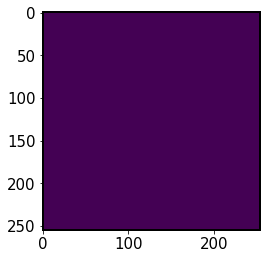

In [3]:
hdul0 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/0_original/opd_9000001_0.fits.gz')
plt.imshow(hdul0[0].data)

In [10]:
x = np.ravel(hdul0[0].data)
x[x>0]

array([], dtype=float64)

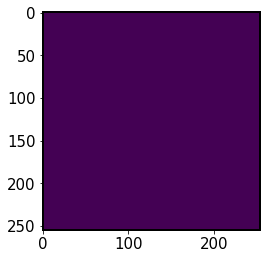

In [58]:
hdul1 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/1_/opd_9000001_0.fits.gz')
plt.imshow(hdul1[0].data)

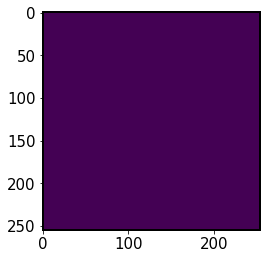

In [62]:
hdul2 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/2_/opd_9000001_2.fits.gz')
plt.imshow(hdul2[0].data)

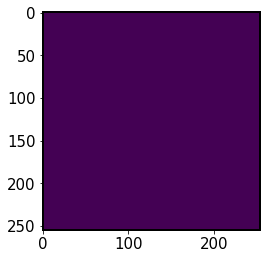

In [11]:
hdul3 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/3_/opd_9000001_2.fits.gz')
plt.imshow(hdul3[0].data)

Try using the actual `opd.inst` and `opd.cmd` from `/project/scichris/aos/imgCloseLoop/iter0/pert/` : 

In [12]:
hdul4 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/4_/opd_9000001_2.fits.gz')
plt.imshow(hdul4[0].data)

FileNotFoundError: [Errno 2] No such file or directory: '/project/scichris/aos/AOS/DM-28360/test_OPD/4_/opd_9000001_2.fits.gz'

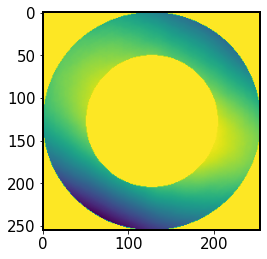

In [10]:
hdul5 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/5_/opd_9006000_2.fits.gz')
plt.imshow(hdul5[0].data)

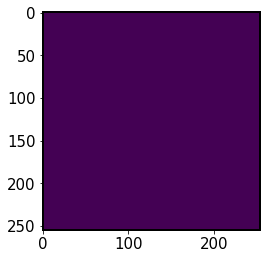

In [17]:
hdul5 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/6_/opd_9000001_2.fits.gz')
plt.imshow(hdul5[0].data)

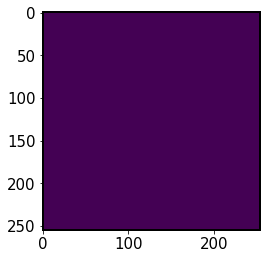

In [18]:
hdul5 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/7_/opd_9000001_2.fits.gz')
plt.imshow(hdul5[0].data)

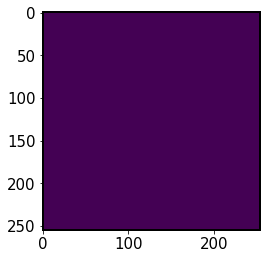

In [6]:
%matplotlib inline
hdul8 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/8_/opd_9000001_2.fits.gz')
plt.imshow(hdul8[0].data)

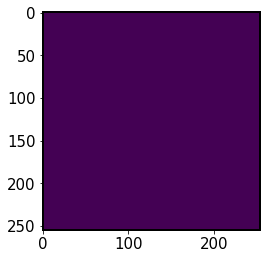

In [3]:
%matplotlib inline
hdul9 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/9_/opd_9000001_2.fits.gz')
plt.imshow(hdul9[0].data)

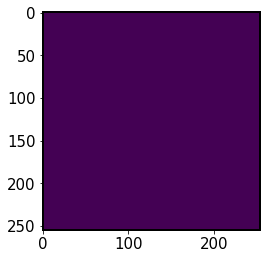

In [4]:
%matplotlib inline
hdul9 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/10_/opd_9000001_2.fits.gz')
plt.imshow(hdul9[0].data)

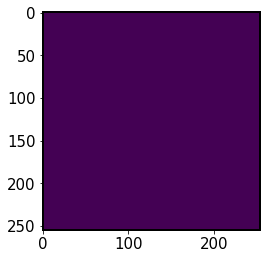

In [4]:
%matplotlib inline
hdul9 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/11_/opd_9000001_2.fits.gz')
plt.imshow(hdul9[0].data)

In [9]:
np.where(hdul9[0].data>0)

(array([], dtype=int64), array([], dtype=int64))

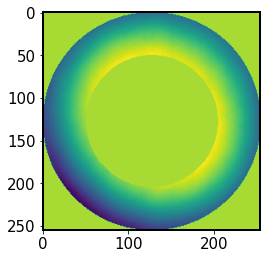

In [7]:
%matplotlib inline
hdul12 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/12_/opd_9000001_2.fits.gz')
plt.imshow(hdul12[0].data)

For  `12_` the `inst` and `cmd` files were stripped of all extra preamble commands, but the OPD xy is taken from https://github.com/lsst-ts/ts_phosim/blob/develop/policy/instrument/comcam/fieldXy.yaml, which is the center of each CCD in field XY


    inst:
    
    Opsim_obshistid 9000001
    Opsim_filter 2
    rightascension 197.46441300863182
    declination 24.33554243027582
    rotskypos 0.0
    rottelpos 0
    SIM_VISTIME 15
    SIM_NSNAP 1
    opd  0  -0.234700   -0.234700 500.0 
    opd  1  -0.234700    0.000000 500.0 
    opd  2  -0.234700    0.234700 500.0 
    opd  3   0.000000   -0.234700 500.0 
    opd  4   0.000000    0.000000 500.0 
    opd  5   0.000000    0.234700 500.0 
    opd  6   0.234700   -0.234700 500.0 
    opd  7   0.234700    0.000000 500.0 
    opd  8   0.234700    0.234700 500.0 
    
    cmd:
    
    backgroundmode 0
    raydensity 0
    perturbationmode 1
    izernike 0 0 -4.0442156930541306e-05 
    izernike 0 1 -4.332919031597056e-05 
    ...
    ...
    
    

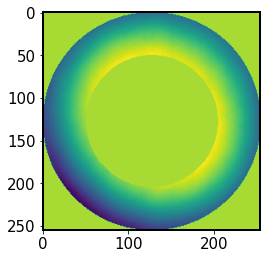

In [9]:
%matplotlib inline
hdul13 = fits.open('/project/scichris/aos/AOS/DM-28360/test_OPD/13_/opd_9000001_2.fits.gz')
plt.imshow(hdul13[0].data)

Here for `13_` we kept all the original preamble information. As expected, it does not make any difference - the OPD are the same:

    inst 
    
    Opsim_obshistid 9000001
    Opsim_filter 2
    mjd 59580
    SIM_SEED 1000
    rightascension 197.46441300863182
    declination 24.33554243027582
    rotskypos 0.0
    rottelpos 0
    SIM_VISTIME 15
    SIM_NSNAP 1
    moonphase 0.0
    moonalt -90
    sunalt -90
    Opsim_rawseeing 0.69
    camconfig 3
    opd  0  -0.234700   -0.234700 500.0 
    opd  1  -0.234700    0.000000 500.0 
    opd  2  -0.234700    0.234700 500.0 
    opd  3   0.000000   -0.234700 500.0 
    opd  4   0.000000    0.000000 500.0 
    opd  5   0.000000    0.234700 500.0 
    opd  6   0.234700   -0.234700 500.0 
    opd  7   0.234700    0.000000 500.0 
    opd  8   0.234700    0.234700 500.0 
    
    cmd 
    
    backgroundmode 0
    raydensity 0
    perturbationmode 1
    trackingmode 0
    cleartracking
    clearclouds
    lascatprob 0.0
    contaminationmode 0
    diffractionmode 1
    straylight 0
    detectormode 0
    centroidfile 1
    izernike 0 0 -4.0442156930541306e-05 
    izernike 0 1 -4.332919031597056e-05 
    ....
    ...
    
    

In [12]:
np.where(hdul12[0].data -  hdul13[0].data > 0)

(array([], dtype=int64), array([], dtype=int64))

So they are identical regardless of whether the extra commands are kept there or not. 

Now just need to compare whether fieldXY from ts_phosim correspond to center of each ccd from obs_lsst:

In [39]:
import run_ps1_opd as opd

# this is made with SkySim, taking the field center 
# of each CCD in the instrument
skysim_cat = opd.get_opd_ra_dec(instrument='comCam', raField=0, decField=0, rotskypos=0)

# the inst catalog
# where I pasted the 
# ra,dec generated based on  
# https://github.com/lsst-ts/ts_phosim/blob/develop/policy/instrument/comcam/fieldXy.yaml

cat = np.genfromtxt('/project/scichris/aos/AOS/DM-28360/opd_comCam_high_focal_9000001_6.inst',
                        skip_header=15)

phosim_cat = pd.DataFrame(cat[:, 1:5], columns=['id', 'ra', 'dec', 'g'])


In [40]:
phosim_cat

,id,ra,dec,g
0,0.0,-0.2347,-0.2347,500.0
1,1.0,-0.2347,0.0000,500.0
2,2.0,-0.2347,0.2347,500.0
3,3.0,0.0000,-0.2347,500.0
4,4.0,0.0000,0.0000,500.0
5,5.0,0.0000,0.2347,500.0
6,6.0,0.2347,-0.2347,500.0
7,7.0,0.2347,0.0000,500.0
8,8.0,0.2347,0.2347,500.0


In [41]:
m = skysim_cat['ra']>180
skysim_cat['ra'][m] = skysim_cat['ra'][m] - 360
skysim_cat

<ipython-input-41-41f0205c186c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skysim_cat['ra'][m] = skysim_cat['ra'][m] - 360


,ra,dec,xPx,yPx,r,objid
0,0.237388,-0.232830,2035.5,1999.5,15.0,0
1,0.002667,-0.232832,2035.5,1999.5,15.0,1
2,-0.232054,-0.232830,2035.5,1999.5,15.0,2
3,0.237388,0.001889,2035.5,1999.5,15.0,3
4,0.002667,0.001889,2035.5,1999.5,15.0,4
5,-0.232054,0.001889,2035.5,1999.5,15.0,5
6,0.237388,0.236608,2035.5,1999.5,15.0,6
7,0.002667,0.236610,2035.5,1999.5,15.0,7
8,-0.232054,0.236608,2035.5,1999.5,15.0,8


In [42]:
phosim_cat

,id,ra,dec,g
0,0.0,-0.2347,-0.2347,500.0
1,1.0,-0.2347,0.0000,500.0
2,2.0,-0.2347,0.2347,500.0
3,3.0,0.0000,-0.2347,500.0
4,4.0,0.0000,0.0000,500.0
5,5.0,0.0000,0.2347,500.0
6,6.0,0.2347,-0.2347,500.0
7,7.0,0.2347,0.0000,500.0
8,8.0,0.2347,0.2347,500.0


Text(0, 0.5, 'dec [deg]')

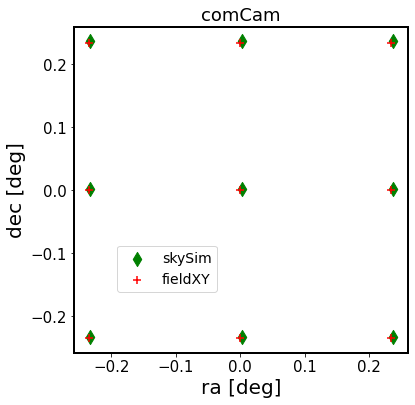

In [66]:

%matplotlib inline

fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(skysim_cat['ra'], skysim_cat['dec'], marker='d', c='green',s=100,label='skySim')
ax.scatter(phosim_cat['ra'], phosim_cat['dec'], marker='+', c='red',label='fieldXY',s=67)
ax.legend(bbox_to_anchor=(0.45,0.35),fontsize=14)
ax.set_title('comCam')
ax.set_xlabel('ra [deg]')
ax.set_ylabel('dec [deg]')


They're basically the same, par the difference in whether the ra is allowed to be smaller than 0, or not... 

So I also updated range of field x in deg, field y in deg,  to run from (-180,180) rather than (0,360) in `run_ps1_opd`.

I generate all OPD inst files with 

    python run_ps1_opd.py --instruments comCam lsstCam wfs --fields high med low Baade --positions focal intra extra 

I run them generating OPD with 

    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert05_NCSA.cmd
    
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file noBkgndPert05_NCSA.cmd
    

Inspect the results:

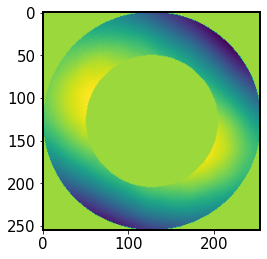

In [102]:
%matplotlib inline
# using qckBkgndPert05_NCSA.cmd  
hdul = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000031/opd/opd_9000031_0.fits.gz')
plt.imshow(hdul[0].data)

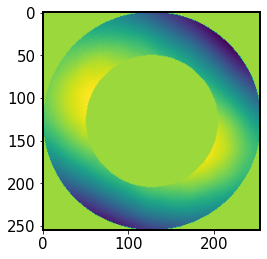

In [103]:
# using qckBkgndPert05_NCSA.cmd  , but extra-focal - should be identical as the one above 
# although the focal movement may indeed create a different OPD...
hdul1 = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/extra/9000131/opd/opd_9000131_0.fits.gz')
plt.imshow(hdul1[0].data)

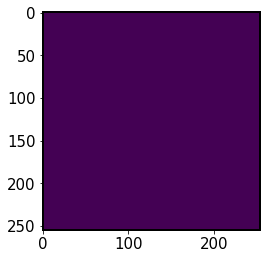

In [104]:
# focal - extra = intra
plt.imshow(hdul[0].data- hdul1[0].data)

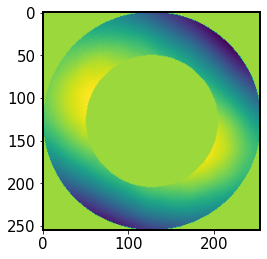

In [106]:
# using qckBkgndPert05_NCSA.cmd  

hdul2 = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/intra/9000231/opd/opd_9000231_0.fits.gz')
plt.imshow(hdul2[0].data)

And indeed intra-focal looks the same as focal - extra... 

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam_high_intra_9000231.inst -i comcam -e 1     -c /project/scichris/aos/AOS/DM-28360/qckBkgndPert05_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/comCam/high/intra/9000231/opd -p 24  -o /project/scichris/aos/AOS/DM-28360/comCam/high/intra/9000231/opd > /project/scichris/aos/AOS/DM-28360/comCam/high/intra/9000231/opdPhoSim.log 2>&1

But it shouldn't be different -  the OPD should be evaluated for the in-focus position (i.e. no defocal movement)! See in imgCloseLoop - there aren't different OPDs for intra or extra-focal images, and `opd.inst`  has all move commands set to `0`...

Re-generate OPD, removing the defocal move... 

    python run_ps1_opd.py --instruments comCam lsstCam wfs --fields high med low Baade --positions focal intra extra 

I run them generating OPD with 

    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert05_NCSA.cmd
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert00_NCSA.cmd
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file noBkgndPert05_NCSA.cmd
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments comCam --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file noBkgndPert00_NCSA.cmd
    

So in my understanding all OPDs would be the same for a given cmd file, since they're only based on the perturbations... 

In other words , comcam high focal == comcam high extra == comcam high intra == comcam med focal == comcam med extra == comcam med intra == ... etc. for qckBkgndPert05_NCSA.cmd , and same for other cmd files 

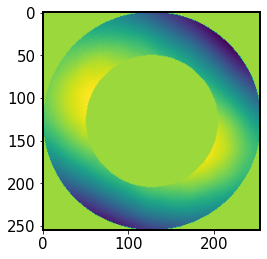

In [107]:
hdul = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/med/focal/9001031/opd/opd_9001031_0.fits.gz')
plt.imshow(hdul[0].data)

In [112]:
np.where(hdul[0].data - hdul2[0].data != 0)
# this shows that comcam med focal  OPD == comcam high intra OPD 

(array([], dtype=int64), array([], dtype=int64))

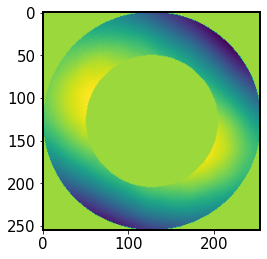

In [113]:

hdul = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/med/extra/9001131/opd/opd_9001131_0.fits.gz')
plt.imshow(hdul[0].data)

BUT a different set of perturbations should create a different OPD... right?? 

In [123]:
#Compare high focal Pert05 to Pert00 : 

%matplotlib inline
# using qckBkgndPert05_NCSA.cmd  
hdul = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000031/opd/opd_9000031_0.fits.gz')
# using qckBkgndPert00_NCSA.cmd 
hdul1 = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000021/opd/opd_9000021_0.fits.gz')



In [125]:
np.where(hdul[0].data-hdul1[0].data != 0 )

(array([  0,   0,   0, ..., 254, 254, 254]),
 array([116, 117, 118, ..., 133, 134, 135]))

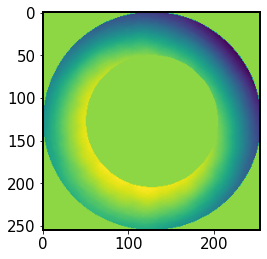

In [126]:
plt.imshow(hdul1[0].data)

It does look different! So indeed, we will only have four different sets of OPD per instruments (for four different sets of CMD files). And I'm not sure if there even would be a difference between quick background and no background with the same perturbations  - it shouldd not matter since  we're not observing anything .... Lets see:

In [127]:
# compare high focal qckBkgndPert05   to noBkgndPert05 

# qckBkgndPert05
hdul_qck = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000031/opd/opd_9000031_0.fits.gz')
# noBkdndPert05 
hdul_no = fits.open('/project/scichris/aos/AOS/DM-28360/comCam/high/focal/9000011/opd/opd_9000011_0.fits.gz')
np.where(hdul_qck[0].data-hdul_no[0].data != 0 )

(array([], dtype=int64), array([], dtype=int64))

ok, so they are indeed identical irrespective of the background! 

So I could just put those in a separate directory, and say that the OPD got evaluated 
for Pert00 and Pert05, and for each field (high,med,low..), position (focal,defocal), background (qck,no) , it's all the same  - there are only two distinct OPDs for each instrument - one for Pert00 , the other for Pert05. 

But I made all different inst files so that the obshistid used to create the OPD would be the same as that used for each image, and thus for OPD to be stored in the same directory as the image t make it easier to figure out which OPD to use ... 

But on confluence I could just point to eg. 
    
    DM-28360/comCam/opd_Pert00 
    DM-28360/comCam/opd_Pert05
    DM-28360/lsstCam/opd_Pert00 
    DM-28360/lsstCam/opd_Pert05 
    DM-28360/wfs/opd_Pert00 
    DM-28360/wfs/opd_Pert05 
    
and that would be it! 

Te-Wei also pointed to checking with `ts_wep` https://github.com/lsst-ts/ts_wep/blob/9e5ccfa096e0949ba3f90569ba0488d747776dd7/python/lsst/ts/wep/bsc/WcsSol.py#L357 

In [1]:
import numpy as np

    focalPlaneArray = self._focalPlaneCoordsFromRaDec(ra, dec)
    
which has 

    
    xMmList = []
    yMmList = []

    for raPt, decPt in zip(ra, dec):

        cameraChip = self._camera[self.centerCcd]

        raDecPt = lsst.geom.SpherePoint(
            raPt * lsst.geom.degrees, decPt * lsst.geom.degrees
        )
        # Get xy in pixels
        xyPix = self.skyWcs.skyToPixel(raDecPt)
        xMm, yMm = cameraChip.transform(xyPix, PIXELS, FOCAL_PLANE)
        xMmList.append(xMm)
        yMmList.append(yMm)

    return np.array([xMmList, yMmList])

NB: for corner sensors, calculate OPD in the center, in between the two sensors, because we're taking the extra-focal part from one part and intra-focal from the other, i.e. they;re not right on top of each other. 

In [2]:
import numpy as np

import lsst.geom
import lsst.obs.lsst as obs_lsst
from lsst.obs.base import createInitialSkyWcsFromBoresight
from lsst.afw.cameraGeom import FOCAL_PLANE, PIXELS


# def setObsMetaData(self, ra, dec, rotSkyPos, centerCcd="R22_S11"):
#         """Set up the WCS by specifying the observation meta data.
ra,dec = 0,0
rotSkyPos = 0
boresightPointing = lsst.geom.SpherePoint(ra, dec, lsst.geom.degrees)
centerCcd = 'R22_S11'

from lsst.obs.lsst import LsstCam, LsstComCam
#camera = LsstComCam().getCamera()
camera = LsstComCam().getCamera()

skyWcs = createInitialSkyWcsFromBoresight(
        boresightPointing,
        rotSkyPos * lsst.geom.degrees,
        camera[centerCcd],
        flipX=False,
    )

In [ ]:
# def _focalPlaneCoordsFromRaDec(self, ra, dec):
#     """Get the focal plane coordinates for all objects in the catalog.
        
xMmList = []
yMmList = []

for raPt, decPt in zip(ra, dec):

    cameraChip = camera[centerCcd]

    raDecPt = lsst.geom.SpherePoint(
        raPt * lsst.geom.degrees, decPt * lsst.geom.degrees
    )
    # Get xy in pixels
    xyPix = skyWcs.skyToPixel(raDecPt)
    xMm, yMm = cameraChip.transform(xyPix, PIXELS, FOCAL_PLANE)
    xMmList.append(xMm)
    yMmList.append(yMm)

return np.array([xMmList, yMmList])

  * getting middle ra, dec from SkySim is not the same as fieldXY for WFS 

  * getting focalPlaneCoordsFromRaDec may be better than getting the focalPlane coords as ra,dec assuming (0,0) boresight...
  
--> Why the centers are off ? 
--> Which ones to use?


--> Under rotation - test how it behaves - need to have some way of calculating OPD as the rotation angle is increased...

## Calculate OPD for the corner sensors only (wfs)

In [14]:
import run_ps1_opd as opd

# this is made with SkySim, taking the field center 
# of each CCD in the instrument
skysim_cat = opd.get_opd_ra_dec(instrument='wfs', raField=0, decField=0, rotskypos=0)


/project/scichris/aos/ts_wep/python/lsst/ts/wep/bsc/WcsSol.py:45: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  self._camera = obs_lsst.lsstCamMapper.LsstCamMapper().camera


In [22]:
list(skysim_cat['dec'].values)

[-1.1322778103399687,
 -1.2474193576181027,
 1.182795264517186,
 1.1969030878961635,
 -1.1827952645171782,
 -1.1969030878961564,
 1.1322778103399762,
 1.2474193576181096]

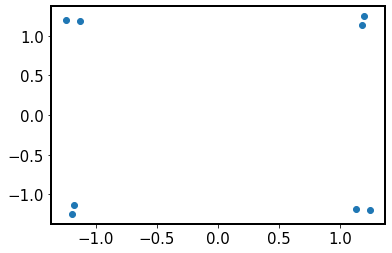

In [25]:

plt.scatter(list(skysim_cat['ra'].values), list(skysim_cat['dec'].values))

I prepared all inst files with 

python run_ps1_opd.py --instruments comCam lsstCam wfs --fields high med low Baade --positions focal intra extra 

which took the field positions from skySim, assuming the boresight = (0,0) deg 


I generated the OPD with 

 ✅    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments wfs --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert05_NCSA.cmd

 ✅    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments wfs --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file qckBkgndPert00_NCSA.cmd
    
 ✅    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments wfs --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file noBkgndPert05_NCSA.cmd
    
    ...
    
    python  /project/scichris/aos/AOS/run_ps1_phosim.py --opd  --instruments wfs --fields high med low Baade --positions focal extra intra --phosim_p 24  --cmd_file noBkgndPert00_NCSA.cmd
    

Check the result 


In [1]:
from astropy.io import fits
import os 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

hdul = fits.open('/project/scichris/aos/AOS/DM-28360/wfs/high/focal/9020031/opd/opd_9020031_0.fits.gz')

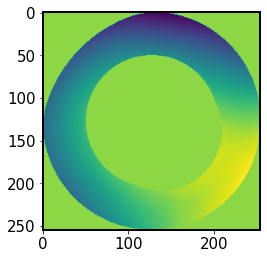

In [5]:
plt.imshow(hdul[0].data)

It's distorted, since this one used the following combination:

In [7]:
import run_ps1_functions as func
import imp
imp.reload(func)
func.invert_obshistid?

Signature: func.invert_obshistid(obshistid)
Docstring:
Given obshistid, invert the logic and find the 
instrument, field, position, cmd_file, run

Parameters:
-----------
obshistid: str
     The obs hist id, eg. "9020031"
    
Returns:
--------
inverted_dict:  dic
     A dictionary containing keys that resolve the obshistid:
     instrument, field, position, cmd, run
File:      ~/notebooks/run_ps1_functions.py
Type:      function


In [8]:
func.invert_obshistid("9020031")

{'instrument': 'wfs',
 'field': 'high',
 'position': 'focal',
 'cmd': 'qckBkgndPert05',
 'run': 1}

In [ ]:
So from the obshistid we see that this OPD was created using large perturbations 

This should be identical to eg. OPD for wfs for baade, extra, but with the same perturbations:

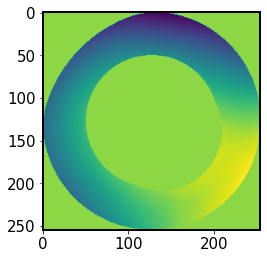

In [10]:
hdul1 = fits.open('/project/scichris/aos/AOS/DM-28360/wfs/Baade/extra/9023131/opd/opd_9023131_0.fits.gz')
plt.imshow(hdul1[0].data)

In [13]:
np.sum(hdul[0].data-hdul1[0].data)

0.0

They are indeed identical! 

Also, compare the OPD for same pert with and without background - they should be identical since baqckgeound does not get evaluated at all ... 

In [58]:
from astropy.io import fits
import os 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

instrument = 'wfs'
cmd_file = 'qckBkgndPert05_NCSA.cmd'
run = 1 
field = 'high'
position ='focal'
obshistid = func.calculate_obshistid(
                        instrument, field, position, cmd_file, run
                    )
# inst_file = f'opd_{instrument}_{field}_{position}_{obshistid}.inst'
# print(inst_file)

hdul = fits.open(f'/project/scichris/aos/AOS/DM-28360/{instrument}/{field}/{position}/{obshistid}/opd/opd_{obshistid}_0.fits.gz')


opd_wfs_high_focal_9020031.inst


In [59]:
cmd_file = 'noBkgndPert05_NCSA.cmd'
obshistid = func.calculate_obshistid(
                        instrument, field, position, cmd_file, run
                    )

hdul1 = fits.open(f'/project/scichris/aos/AOS/DM-28360/{instrument}/{field}/{position}/{obshistid}/opd/opd_{obshistid}_0.fits.gz')


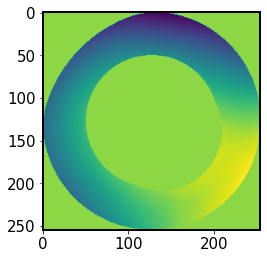

In [61]:
plt.imshow(hdul[0].data)

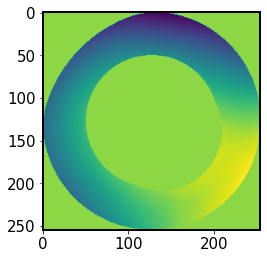

In [62]:
plt.imshow(hdul1[0].data)

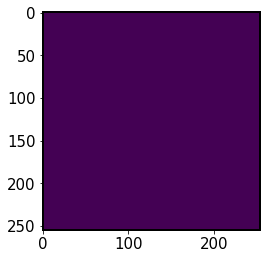

In [63]:
plt.imshow(hdul[0].data-hdul1[0].data)

ok, for two different backgrounds but same perturbations these are identical , as expcted. 

Would be the same to run one simulation of OPD and copy the files, but then obshistids would be different etc., so it's best (in my opinion) to just re-simulate the same OPD 12 times for a given {instrument,perturbation  combination}. It takes 80 sec per combination, so 12x80 = 960 sec = 15 mins for all corner sensors....

NB: need to re-calculate that , i.e. need to get the center of each WFS sensor, instead of the middle of each sensor ... 

Read-in whatever  ra/dec was in each inst file, find the middle, and just re-save... 



In [1]:
import run_ps1_functions as func

instrument = 'wfs'
cmd_file = 'qckBkgndPert05_NCSA.cmd'
run = 1 
for field in ['high','med','low', 'Baade']:
    for position in ['focal','intra', 'extra']:
        
        obshistid = func.calculate_obshistid(
                        instrument, field, position, cmd_file, run
                    )
        inst_file = f'opd_{instrument}_{field}_{position}_{obshistid}.inst'
        print(inst_file)

        

opd_wfs_high_focal_9020031.inst
opd_wfs_high_intra_9020231.inst
opd_wfs_high_extra_9020131.inst
opd_wfs_med_focal_9021031.inst
opd_wfs_med_intra_9021231.inst
opd_wfs_med_extra_9021131.inst
opd_wfs_low_focal_9022031.inst
opd_wfs_low_intra_9022231.inst
opd_wfs_low_extra_9022131.inst
opd_wfs_Baade_focal_9023031.inst
opd_wfs_Baade_intra_9023231.inst
opd_wfs_Baade_extra_9023131.inst


In [2]:
import numpy as np
import pandas as pd 
import os
# show the input instance catalog made with sky sim 
root_dir = '/project/scichris/aos/AOS/DM-28360/'
inst_path = os.path.join(root_dir, inst_file)
# read in the input instance catalog 
cat = np.genfromtxt(inst_path,
                        skip_header=15)

cat_df = pd.DataFrame(cat[:,1:5], columns=['id', 'ra', 'dec', 'g'])

import matplotlib.pyplot as plt

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

In [3]:
cat[:,1:5]

array([[  0.        ,  -1.1830263 ,  -1.13227781, 500.        ],
       [  1.        ,  -1.19718685,  -1.24741936, 500.        ],
       [  2.        ,  -1.13251915,   1.18279526, 500.        ],
       [  3.        ,  -1.24769163,   1.19690309, 500.        ],
       [  4.        ,   1.13251915,  -1.18279526, 500.        ],
       [  5.        ,   1.24769163,  -1.19690309, 500.        ],
       [  6.        ,   1.1830263 ,   1.13227781, 500.        ],
       [  7.        ,   1.19718685,   1.24741936, 500.        ]])

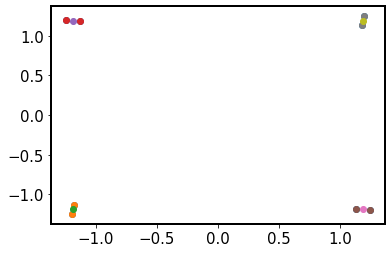

In [4]:
mean_x = []
mean_y = []

plt.scatter(cat_df['ra'], cat_df['dec'])

for a in [(cat_df['ra']<0), (cat_df['ra']>0)]:
    for b in [(cat_df['dec']<0), (cat_df['dec']>0)]: 
        m = a & b
        plt.scatter(cat_df['ra'][m], cat_df['dec'][m])
        x = cat_df['ra'][m].values
        y = cat_df['dec'][m].values
        plt.scatter(np.mean(x), np.mean(y))
        mean_x.append(np.mean(x))
        mean_y.append(np.mean(y))

In [5]:
mean_x

[-1.1901065744782784,
 -1.1901053902783758,
 1.190105390278354,
 1.190106574478269]

In [6]:
mean_y

[-1.1898485839790358,
 1.1898491762066747,
 -1.1898491762066672,
 1.189848583979043]

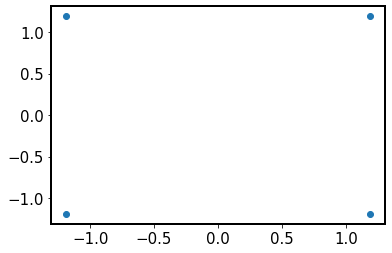

In [7]:
plt.scatter(mean_x, mean_y)

Save the mean-field position for WFS: 

In [9]:
from astropy.table import Table

coords = Table(data=[mean_x, mean_y], 
                 names=['ra','dec', ]  )
        
 
    
# add a column with object id 
coords['objid'] = np.arange(len(coords))

panda_cat = coords.to_pandas()

raField = 0
decField = 0
exposure=15



In [12]:
panda_cat

,ra,dec,objid
0,-1.190107,-1.189849,0
1,-1.190105,1.189849,1
2,1.190105,-1.189849,2
3,1.190107,1.189849,3


In [52]:
func.write_opd_inst_file(panda_cat, raField, decField,
                    phosim_file=opd_fpath, passband="r", out_dir="./", camconfig=3,
                    exposure=exposure, obsid=obshistid, position=position, mjd=59580,
                    magcol=None)

'extra'

Update all inst files

Below I take the four field positions calculated above, and save them. I overwrite the files since the names are significant . Even though these are essentially the same OPD files, I make all these separate so that they have different obsHistId.

In [17]:
import run_ps1_functions as func
import numpy as np
import pandas as pd 
import os
from astropy.table import Table
import run_ps1_opd as opd 

root_dir = '/project/scichris/aos/AOS/DM-28360/'
instrument = 'wfs'

run = 1 

# ra,dec are irrelevant for OPD ... 
raField = 0
decField = 0
exposure=15

for bkgnd in ['qck','no']:
    for pert in [0,5]:
        cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
        for field in ['high','med','low', 'Baade']:
            for position in ['focal','intra', 'extra']:

                obshistid = func.calculate_obshistid(
                                instrument, field, position, cmd_file, run
                            )
                inst_file = f'opd_{instrument}_{field}_{position}_{obshistid}.inst'
                print(inst_file)


                # show the input instance catalog made with sky sim 
                inst_path = os.path.join(root_dir, inst_file)

                opd.write_opd_inst_file(panda_cat, raField, decField,
                                        inst_path, passband="r", 
                                         camconfig=3, exposure=exposure, 
                                         obsid=obshistid, 
                                         position=position, mjd=59580,
                                         magcol=None)



opd_wfs_high_focal_9020021.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_high_focal_9020021.inst
opd_wfs_high_intra_9020221.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_high_intra_9020221.inst
opd_wfs_high_extra_9020121.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_high_extra_9020121.inst
opd_wfs_med_focal_9021021.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_med_focal_9021021.inst
opd_wfs_med_intra_9021221.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_med_intra_9021221.inst
opd_wfs_med_extra_9021121.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_med_extra_9021121.inst
opd_wfs_low_focal_9022021.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_low_focal_9022021.inst
opd_wfs_low_intra_9022221.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_low_intra_9022221.inst
opd_wfs_low_extra_9022121.inst
Saved as  /project/scichris/aos/AOS/DM-28360/opd_wfs_low_extra_9022121.inst
opd_wfs_Baade_focal_9023021.ins

I also save a template wfs as `opd_wfs.inst` : 
    
    Opsim_obshistid 9000000
    Opsim_filter 2
    mjd 59580
    SIM_SEED 1000
    rightascension 0
    declination 0
    rotskypos 0.0
    rottelpos 0
    SIM_VISTIME 15
    SIM_NSNAP 1
    moonphase 0.0
    moonalt -90
    sunalt -90
    Opsim_rawseeing 0.69
    camconfig 3
    opd 0 -1.1901065744782784 -1.1898485839790358 500 
    opd 1 -1.1901053902783758 1.1898491762066747 500 
    opd 2 1.190105390278354 -1.1898491762066672 500 
    opd 3 1.190106574478269 1.189848583979043 500 
    
run that once for each `cmd` file: 
    
    
    


In [54]:


bkgnd= 'no'
for pert in [0,5]:
    cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
    phosim_path = '/project/scichris/aos/phosim_syseng4/phosim.py'
    inst_file_path='/project/scichris/aos/AOS/DM-28360/opd_wfs.inst'
    instr = 'lsst'
    cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
    cmd_file_path = os.path.join('/project/scichris/aos/AOS/DM-28360/', cmd_file)
    out_dir = f'/project/scichris/aos/AOS/DM-28360/wfs/opd/{cmd_file[:-len("_NCSA.cmd")]}'
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    phosim_p = 24 
    phosim_log_path = os.path.join(out_dir,'opdPhoSim.log')

    command = f"python {phosim_path} {inst_file_path} -i {instr} -e 1 \
    -c {cmd_file_path} -w {out_dir} -p {phosim_p}  -o {out_dir} > {phosim_log_path} 2>&1 "
    print('\n')
    print(command)



python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_wfs.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/wfs/opd/noBkgndPert00 -p 24  -o /project/scichris/aos/AOS/DM-28360/wfs/opd/noBkgndPert00 > /project/scichris/aos/AOS/DM-28360/wfs/opd/noBkgndPert00/opdPhoSim.log 2>&1 


python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_wfs.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert05_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/wfs/opd/noBkgndPert05 -p 24  -o /project/scichris/aos/AOS/DM-28360/wfs/opd/noBkgndPert05 > /project/scichris/aos/AOS/DM-28360/wfs/opd/noBkgndPert05/opdPhoSim.log 2>&1 


Inspect the results: two distinct OPDs for WFS

In [1]:
from astropy.io import fits


In [ ]:
# small Perturbatins
hdul = fits.open('/project/scichris/aos/AOS/DM-28360/wfs/opd/Pert00/opd_9000000_0.fits.gz')
import matplotlib.pyplot as plt 
plt.imshow(hdul[0].data)

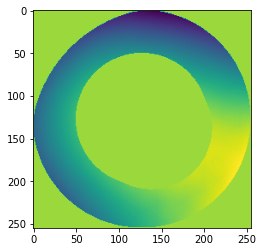

In [3]:
# large Perturbatins
hdul = fits.open('/project/scichris/aos/AOS/DM-28360/wfs/opd/Pert05/opd_9000000_0.fits.gz')
import matplotlib.pyplot as plt 
plt.imshow(hdul[0].data)

OPD got evaluated 
for Pert00 and Pert05, and for each field (high,med,low..), position (focal,defocal), background (qck,no) , it's all the same  - there are only two distinct OPDs for each instrument - one for Pert00 , the other for Pert05. 

Use `focalplanelayout` with larger Euler angle  for SW0: any changes?

    ssh lsst-devl02
    screen -x aos
    
    cd /project/scichris/aos/AOS/DM-28360/wfs/opd/
    mkdir Pert00_SW0_Euler
    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_wfs.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/wfs/opd/Pert00_SW0_Euler -p 24  -o /project/scichris/aos/AOS/DM-28360/wfs/opd/Pert00_SW0_Euler > /project/scichris/aos/AOS/DM-28360/wfs/opd/Pert00_SW0_Euler/opdPhoSim.log 2>&1 
    
    

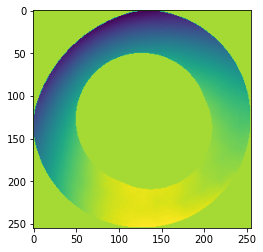

In [4]:
# small pert, before updates
from astropy.io import fits
hdul = fits.open('/project/scichris/aos/AOS/DM-28360/wfs/opd/Pert00/opd_9000000_0.fits.gz')
import matplotlib.pyplot as plt 
plt.imshow(hdul[0].data)

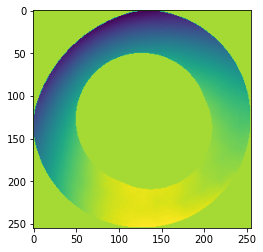

In [6]:
# small pert, after updates 
from astropy.io import fits
hdul_ = fits.open('/project/scichris/aos/AOS/DM-28360/wfs/opd/Pert00_SW0_Euler/opd_9000000_0.fits.gz')
import matplotlib.pyplot as plt 
plt.imshow(hdul[0].data)

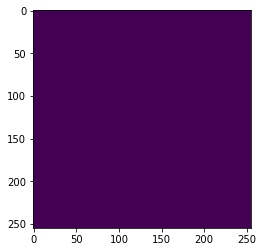

In [7]:
plt.imshow(hdul[0].data-hdul_[0].data)

ok, so they are indeed identical (I wouldn't have thought they would change, since I'm rotating the detector, whereas OPD doesn't really care about the detector, but about the mirror perturbationxz ... )

## Calculate OPD for lsstCam

For lsstCam, we calculate OPD at the center of each CCD. To again make the process quicker, I just take one of each. I make sure that for the corner sensors the OPD is calculated at the center of the combined half-chip



In [46]:
from lsst.obs.lsst import LsstCam, LsstComCam
camera = LsstCam().getCamera()

sensorNames = []
xCenter, yCenter = [], []
for detector in camera:
    name = detector.getName()
    #if 'SW' not in name:
    #    continue
    print(detector.getName())
        
#         bbox = detector.getBBox()
#         xCen, yCen = bbox.centerX, bbox.centerY
#         xCenter.append(xCen)
#         yCenter.append(yCen)
#         sensorNames.append(detector.getName())
        

R01_S00
R01_S01
R01_S02
R01_S10
R01_S11
R01_S12
R01_S20
R01_S21
R01_S22
R02_S00
R02_S01
R02_S02
R02_S10
R02_S11
R02_S12
R02_S20
R02_S21
R02_S22
R03_S00
R03_S01
R03_S02
R03_S10
R03_S11
R03_S12
R03_S20
R03_S21
R03_S22
R10_S00
R10_S01
R10_S02
R10_S10
R10_S11
R10_S12
R10_S20
R10_S21
R10_S22
R11_S00
R11_S01
R11_S02
R11_S10
R11_S11
R11_S12
R11_S20
R11_S21
R11_S22
R12_S00
R12_S01
R12_S02
R12_S10
R12_S11
R12_S12
R12_S20
R12_S21
R12_S22
R13_S00
R13_S01
R13_S02
R13_S10
R13_S11
R13_S12
R13_S20
R13_S21
R13_S22
R14_S00
R14_S01
R14_S02
R14_S10
R14_S11
R14_S12
R14_S20
R14_S21
R14_S22
R20_S00
R20_S01
R20_S02
R20_S10
R20_S11
R20_S12
R20_S20
R20_S21
R20_S22
R21_S00
R21_S01
R21_S02
R21_S10
R21_S11
R21_S12
R21_S20
R21_S21
R21_S22
R22_S00
R22_S01
R22_S02
R22_S10
R22_S11
R22_S12
R22_S20
R22_S21
R22_S22
R23_S00
R23_S01
R23_S02
R23_S10
R23_S11
R23_S12
R23_S20
R23_S21
R23_S22
R24_S00
R24_S01
R24_S02
R24_S10
R24_S11
R24_S12
R24_S20
R24_S21
R24_S22
R30_S00
R30_S01
R30_S02
R30_S10
R30_S11
R30_S12
R30_S20
R30_S21


Just get a ready-made opd inst file, plot it, remove the last few lines. This is because patches to skysim added  an unwanted 90 deg rotation...m

In [39]:
import run_ps1_functions as func
import imp
imp.reload(func)

x_px, y_px  = func.pixel_letter_F(xmin=1500,ymin=1000,yspacing=300, height=2200 )

ra,dec,xPxList, yPxList = func.ccd_xy_to_radec(x_px=x_px, y_px=y_px, boresight_ra=0, 
                                               boresight_dec=0, rotSkyPos=0,
                     sensorNameList = ['R22_S11'])



In [42]:
import run_ps1_functions as func

instrument = 'lsstCam'
cmd_file = 'qckBkgndPert05_NCSA.cmd'
run = 1 
field = 'high'
position='focal'

 
obshistid = func.calculate_obshistid(
            instrument, field, position, cmd_file, run
        )
inst_file = f'opd_{instrument}_{field}_{position}_{obshistid}.inst'
print(inst_file)

import numpy as np
import pandas as pd 
import os
# show the input instance catalog made with sky sim 
root_dir = '/project/scichris/aos/AOS/DM-28360/'
inst_path = os.path.join(root_dir, inst_file)

# read in the input instance catalog 
cat = np.genfromtxt(inst_path,
                        skip_header=15)

cat_df = pd.DataFrame(cat[:,1:5], columns=['id', 'ra', 'dec', 'g'])

import matplotlib.pyplot as plt

from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18  

opd_lsstCam_high_focal_9010031.inst


In [49]:
inst_path

'/project/scichris/aos/AOS/DM-28360/opd_lsstCam_high_focal_9010031.inst'

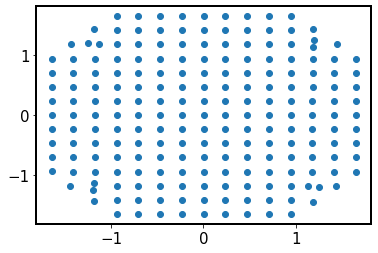

In [43]:

plt.scatter(cat_df['ra'], cat_df['dec'])



In [44]:
cat_df['ra']

0      0.942248
1      0.707575
2      0.472878
3      0.942248
4      0.707575
         ...   
200    1.197187
201   -1.180888
202   -1.435089
203   -1.132519
204   -1.247692
Name: ra, Length: 205, dtype: float64

The last sixteen entries should be corner sensors (8) and guiders (8). Make sure: 

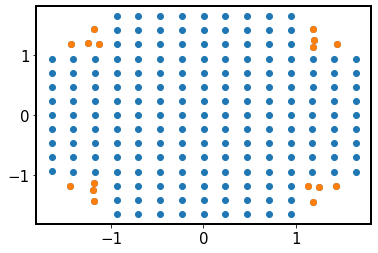

In [48]:
plt.scatter(cat_df['ra'], cat_df['dec'])

plt.scatter(cat_df['ra'][-16:], cat_df['dec'][-16:])


In [51]:
cat_df['id'][-16:]

189    189.0
190    190.0
191    191.0
192    192.0
193    193.0
194    194.0
195    195.0
196    196.0
197    197.0
198    198.0
199    199.0
200    200.0
201    201.0
202    202.0
203    203.0
204    204.0
Name: id, dtype: float64

ok, so remove those, and substitute the 4 mean-field corner sensor locations, save as a new inst file, common to all lsstCam:
    
    cd /project/scichris/aos/AOS/DM-28360/
    cp opd_lsstCam_high_focal_9010031.inst opd_lsstCam.inst
    
    # edit the obshistid, remove the last sixteen entries, add manually four wfs locations
    nano opd_lsstCam.inst
    
  Plot the result:

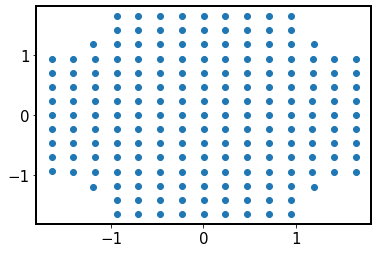

In [53]:
inst_file = 'opd_lsstCam.inst'
root_dir = '/project/scichris/aos/AOS/DM-28360/'
inst_path = os.path.join(root_dir, inst_file)

# read in the input instance catalog 
cat = np.genfromtxt(inst_path,
                        skip_header=15)

cat_df1 = pd.DataFrame(cat[:,1:5], columns=['id', 'ra', 'dec', 'g'])
plt.scatter(cat_df1['ra'], cat_df1['dec'])

Using this inst file, evaluate the OPD for four perturbations:

In [55]:


bkgnd= 'no'
for pert in [0,5]:
    cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
    phosim_path = '/project/scichris/aos/phosim_syseng4/phosim.py'
    inst_file_path='/project/scichris/aos/AOS/DM-28360/opd_lsstCam.inst'
    instr = 'lsst'
    cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
    cmd_file_path = os.path.join('/project/scichris/aos/AOS/DM-28360/', cmd_file)
    out_dir = f'/project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert0{pert}'
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    phosim_p = 24 
    phosim_log_path = os.path.join(out_dir,'opdPhoSim.log')

    command = f"python {phosim_path} {inst_file_path} -i {instr} -e 1 \
    -c {cmd_file_path} -w {out_dir} -p {phosim_p}  -o {out_dir} > {phosim_log_path} 2>&1 "
    print('\n')
    print(command)



python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_lsstCam.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert00 -p 24  -o /project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert00 > /project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert00/opdPhoSim.log 2>&1 


python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_lsstCam.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert05_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert05 -p 24  -o /project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert05 > /project/scichris/aos/AOS/DM-28360/lsstCam/opd/Pert05/opdPhoSim.log 2>&1 


## Calculate OPD for comCam 

In [ ]:
    cd /project/scichris/aos/AOS/DM-28360/
    cp opd_comCam_high_extra_9000131.inst opd_comCam.inst
    
    # edit the obshistid, remove the last sixteen entries, add manually four wfs locations
    nano opd_comCam.inst

In [65]:


bkgnd= 'no'
for pert in [0,5]:
    cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
    phosim_path = '/project/scichris/aos/phosim_syseng4/phosim.py'
    inst_file_path='/project/scichris/aos/AOS/DM-28360/opd_comCam.inst'
    instr = 'lsst'
    cmd_file = f'{bkgnd}BkgndPert0{pert}_NCSA.cmd'
    cmd_file_path = os.path.join('/project/scichris/aos/AOS/DM-28360/', cmd_file)
    out_dir = f'/project/scichris/aos/AOS/DM-28360/comCam/opd/Pert0{pert}'
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    phosim_p = 24 
    phosim_log_path = os.path.join(out_dir,'opdPhoSim.log')

    command = f"python {phosim_path} {inst_file_path} -i {instr} -e 1 \
    -c {cmd_file_path} -w {out_dir} -p {phosim_p}  -o {out_dir} > {phosim_log_path} 2>&1 "
    print('\n')
    print(command)



python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert00_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/comCam/opd/Pert00 -p 24  -o /project/scichris/aos/AOS/DM-28360/comCam/opd/Pert00 > /project/scichris/aos/AOS/DM-28360/comCam/opd/Pert00/opdPhoSim.log 2>&1 


python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/AOS/DM-28360/opd_comCam.inst -i lsst -e 1     -c /project/scichris/aos/AOS/DM-28360/noBkgndPert05_NCSA.cmd -w /project/scichris/aos/AOS/DM-28360/comCam/opd/Pert05 -p 24  -o /project/scichris/aos/AOS/DM-28360/comCam/opd/Pert05 > /project/scichris/aos/AOS/DM-28360/comCam/opd/Pert05/opdPhoSim.log 2>&1 


#  Next:
    
    - update confluence page with OPD data https://confluence.lsstcorp.org/display/LTS/Catalogs+and+images+for+AOS+testing 
    - test the comcam simulated images, make a notebook that reads in each dataset, eg. `AOS_comCam_inspect.ipynb`,
    plots each sensor within a raft (eg. R22_S11), then plots the assembled raft with cameraGeom applying the rotation-
    put the arrows on the image indicating the coordinate system in which they are plotted  
    
    - hyak submit lsstCam sensors that need to be simulated so that there are more simulations added
    - split lsstCam into separate rafts, since there doesn't seem to be any trouble running eg. comCam. Thus submit 
    -s "R12_S00|R12_S01.." , then "R13_S00...." etc, and then repackage and ISR as a separate step 
    
    
    

In [ ]:
Simulate OPD for WFS after segmentation has been updated:
    
    
    